# Import important Libraries

In [1]:
import pandas as pd
# check installed version
import pycaret
pycaret.__version__
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from pycaret.regression import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import os

# PyCaret Binary Classification

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 🚀 Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered. 

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). 

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

# Uploading dataset

In [2]:
def loading_dataset(file_path):
    file_extension = file_path.split('.')[-1]
    
    if file_extension == "csv":
        return pd.read_csv(file_path)
    elif file_extension == "xlsx":
        return pd.read_excel(file_path)
    elif file_path.endswith('.sql'):
        conn = pd.read_sql('your_sql_query', 'your_connection_string')
        return conn
    else:
        raise ValueError("Unsupported file format")
    print("Dataset loaded successfully.")

## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

After running this setup, PyCaret will perform various preprocessing steps, such as handling missing values, encoding categorical variables, and splitting the data into training and testing sets. It will also set up a comparison of different machine learning models with their default configurations.

# PyCaret_Binary_Multiclass_classification

In [3]:
# import pycaret classification and init setup
def PyCaret_Binary_Multiclass_classification(df):
    
    m = input("Please enter the Output column name >>> Y ")
    s = setup(df, target =m, session_id = 123)
    
    # import ClassificationExperiment and init the class
    from pycaret.classification import ClassificationExperiment
    exp = ClassificationExperiment()

    # check the type of exp
    print(type(exp))
    
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
    
    # init setup on exp
    print(exp.setup(df, target = m, session_id = 123))
    
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
    
    # compare baseline models
    best = compare_models()
    
    # compare models using OOP
    print(exp.compare_models())
    
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
          
          
    ## Analyze Model
    #      You can use the `plot_model` function to analyzes the performance of a trained model on the test set.
    #           It may require re-training the model in certain cases.      
          
    # plot confusion matrix
    plot_model(best, plot = 'confusion_matrix') 
     
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
              
          
    #     This code should produce a visualization of the ROC AUC curve, which is a graphical representation of a model's ability 
    #           to distinguish between the positive and negative classes across different probability thresholds.      
    
    # plot AUC
    plot_model(best, plot = 'auc')
    
    
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
    
    
    # plot feature importance
    plot_model(best, plot = 'feature')
    
    
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
    
    
    evaluate_model(best)
    
    
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
    
    
    ## Prediction
    # The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. 
    # When data is `None` (default), it uses the test set (created during the setup function) for scoring.
    
    
    # predict on test set
    holdout_pred = predict_model(best)
    print(holdout_pred)
    
    
    # show predictions df
    print(holdout_pred.head())
    
    
        
    #      The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the 
    #     `target`. We can then use the new data frame without labels for scoring.   
    
    # copy data and drop target

    new_data = df.copy().drop(m,axis = 1)

    
    
    print('''__________________________________________________________________________________________________________
          ______________________________________________________________________________________________________''')
     
    
    # predict model on new_data
    predictions = predict_model(best, data = df)
    print(predictions.head())
    
    
    ## Save Model
    #     Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.
    # save pipeline
    save_model(best, 'my_first_pipeline')
    
    

# PyCaret_Regression

In [4]:
# Import necessary functions from PyCaret
from pycaret.regression import setup, compare_models, plot_model, evaluate_model, predict_model, save_model

# Define the PyCaret regression function
def PyCaret_Regression(df):
    # Prompt for the target column name
    m = input("Please enter the Output column name >>> Y ")
    
    # Set up the PyCaret experiment
    exp = setup(data=df, target=m, session_id=123)
    
    # Compare regression models
    best = compare_models()
    

    plot_model(best, plot = 'residuals') 

    # Analyze the best model's error
    plot_model(best, plot='error')
    
    # Plot feature importance
    plot_model(best, plot='feature')
    
    # Evaluate the best model
    evaluate_model(best)
    
    # Predict on the test set
    holdout_pred = predict_model(best)
    print(holdout_pred.head())
    
    # Copy data and drop the target column for scoring on new_data
    new_data = df.copy().drop(columns=[m])
    
    # Predict on new_data
    predictions = predict_model(best, data=new_data)
    print(predictions.head())
    
    # Save the best model pipeline
    save_model(best, 'my_regression_pipeline')


# Data visualization zone

In [5]:
def data_visualization(df):
    numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
    categorical_cols = df.select_dtypes(include=["object"]).columns
    
    for col in numerical_cols:
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
        
        # Scatter Plot
        sns.scatterplot(data=df, x=col, y=df.columns[-1], ax=axes[0])
        axes[0].set_xlabel(col)
        axes[0].set_ylabel(df.columns[-1])
        axes[0].set_title(f'Scatter Plot: {col} vs {df.columns[-1]}')
        
        # Histogram
        sns.histplot(data=df, x=col, bins=10, ax=axes[1])
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Frequency')
        axes[1].set_title(f'Histogram of {col}')
        
        # Box Plot
        sns.boxplot(data=df, y=col, ax=axes[2])
        axes[2].set_ylabel(col)
        axes[2].set_title(f'Box Plot of {col}')
        
        # Tight layout for numerical plots
        plt.tight_layout()
        plt.show()
    
    for col in categorical_cols:
        if len(df[col].unique()) <= 10:
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
            
            # Pie Chart
            value_counts = df[col].value_counts()
            axes[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axes[0].axis('equal')
            axes[0].set_title(f'Pie Chart of {col}')
            
            # Bar Plot
            value_counts.plot(kind='bar', ax=axes[1])
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('Frequency')
            axes[1].set_title(f'Bar Plot of {col}')
            
            # Tight layout for categorical plots
            plt.tight_layout()
            plt.show()


# Main

For Regression press R for Classification press CR
Drop your datasets path hereC:\Users\AliAy\OneDrive\Desktop\newpycaret\Data_for_regression.csv


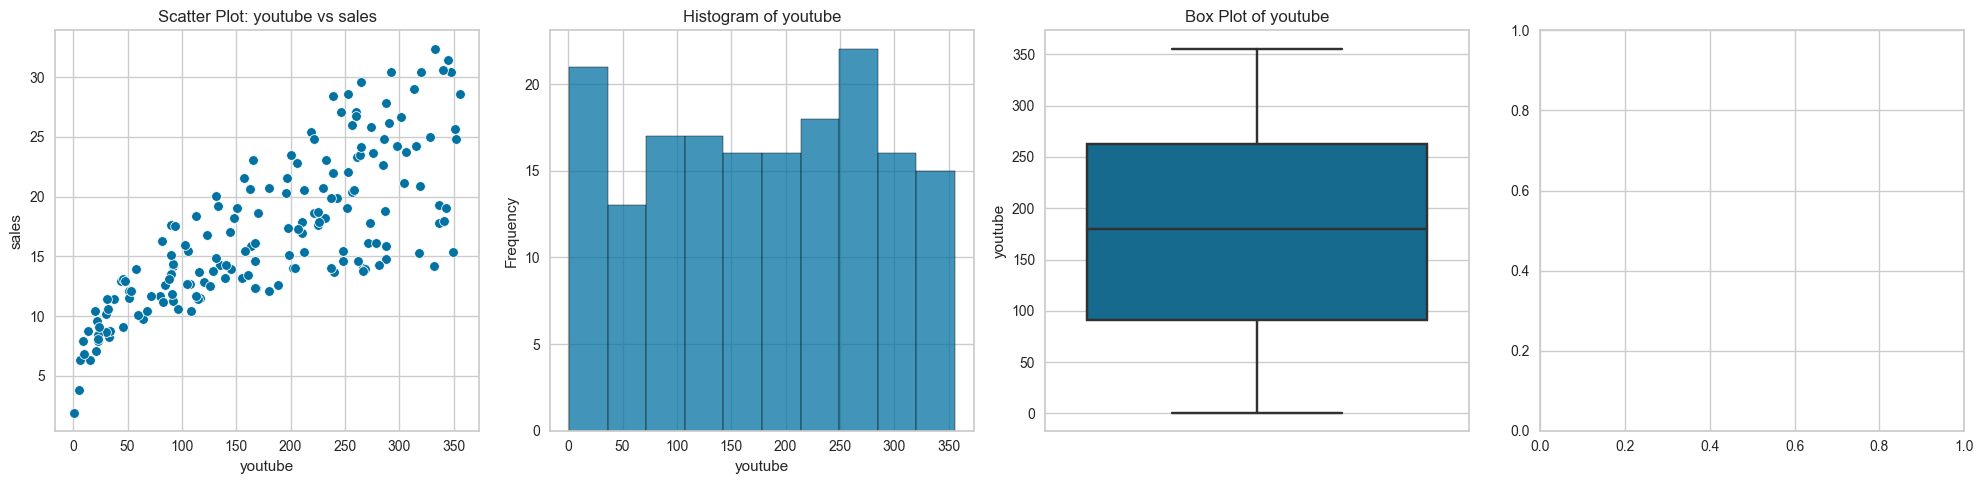

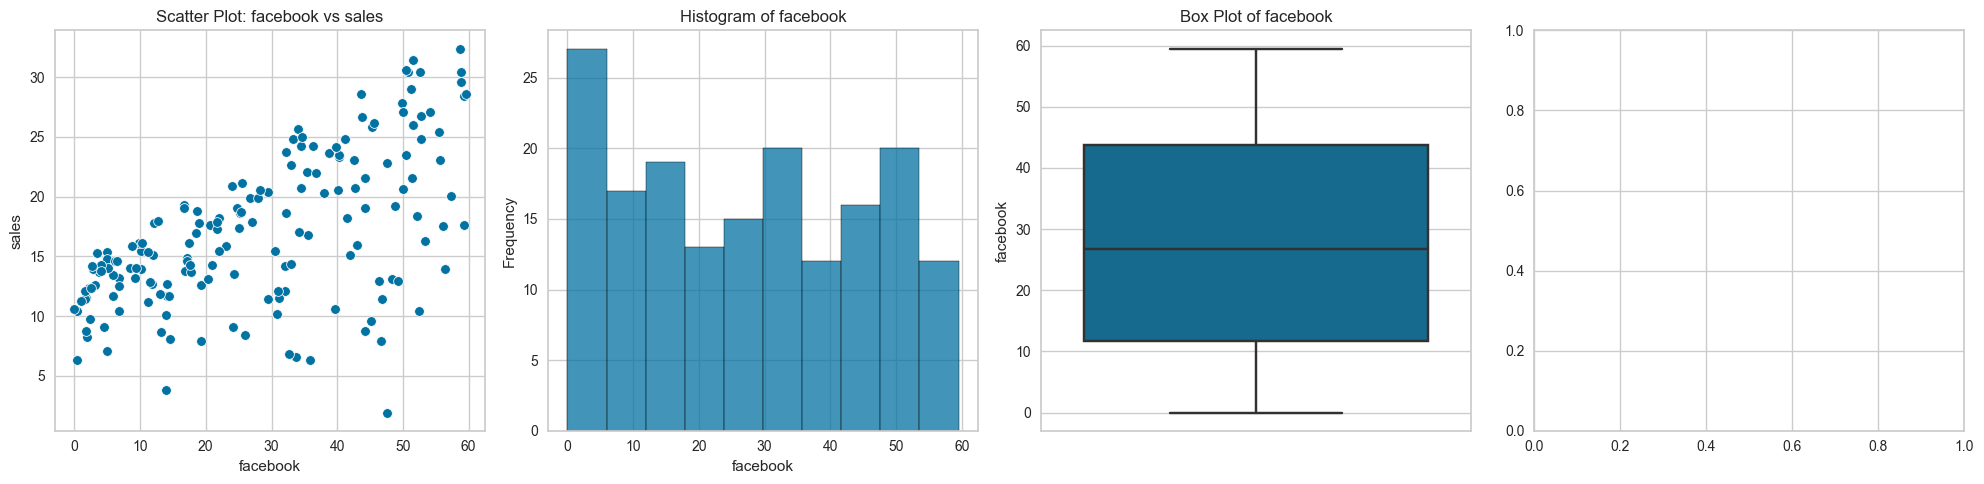

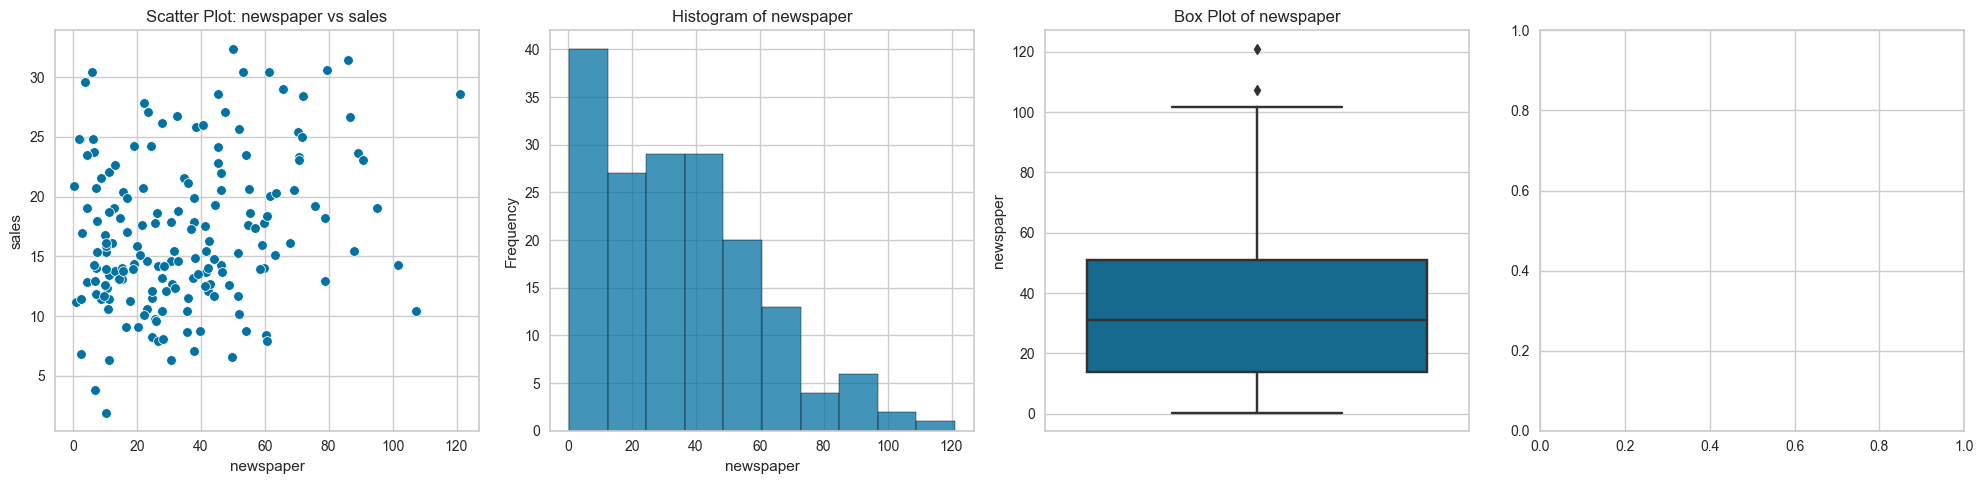

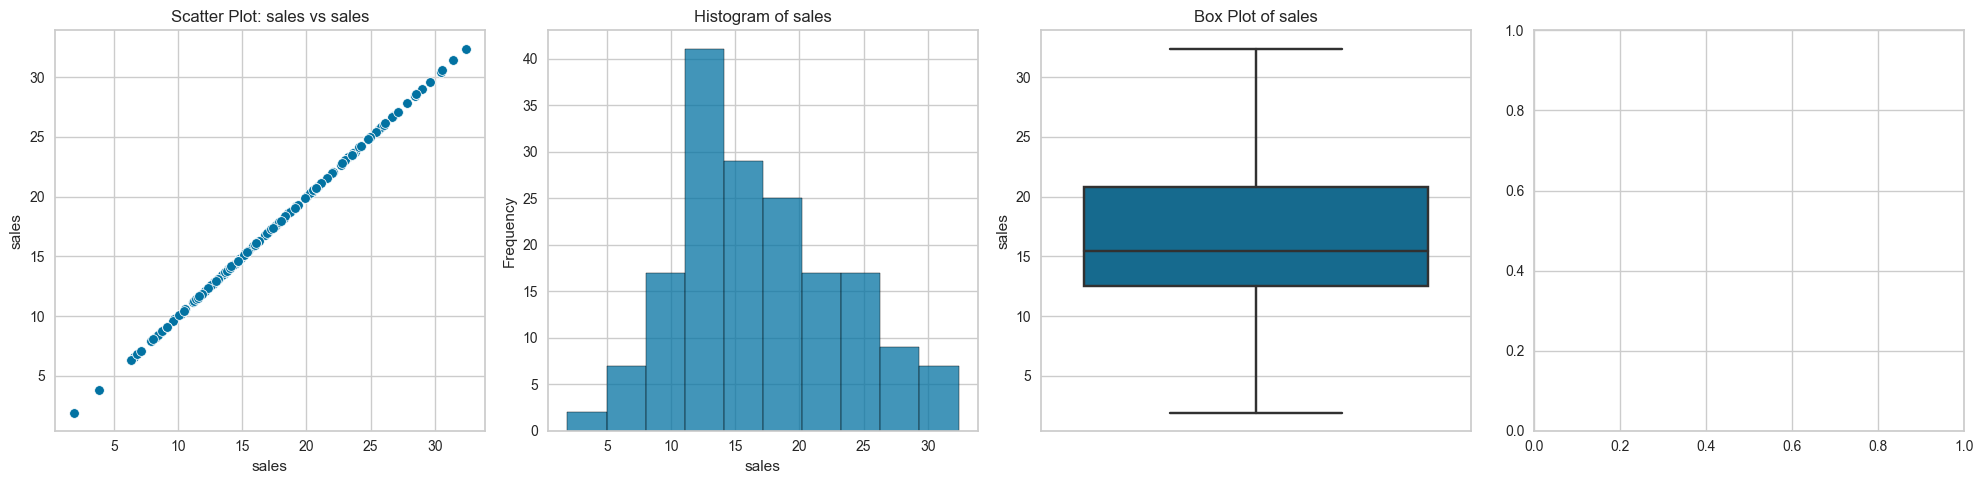

Please enter the Output column name >>> Y sales


,Description,Value
0,Session id,123
1,Target,sales
2,Target type,Regression
3,Original data shape,"(171, 4)"
4,Transformed data shape,"(171, 4)"
5,Transformed train set shape,"(119, 4)"
6,Transformed test set shape,"(52, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5374,0.5073,0.6907,0.9818,0.0494,0.0392,0.1580
gbr,Gradient Boosting Regressor,0.7616,1.0778,0.9995,0.9644,0.0658,0.0508,0.1550
rf,Random Forest Regressor,0.8514,1.2075,1.0758,0.9608,0.0716,0.0583,0.1610
ada,AdaBoost Regressor,1.1116,2.1087,1.4189,0.9295,0.0934,0.0773,0.1560
lightgbm,Light Gradient Boosting Machine,1.2391,2.5970,1.5728,0.9172,0.1193,0.0956,0.1610
dt,Decision Tree Regressor,1.2857,2.6529,1.5616,0.9169,0.1052,0.0847,0.1500
knn,K Neighbors Regressor,1.5056,3.9006,1.9099,0.8692,0.1142,0.0975,0.1520
lasso,Lasso Regression,1.5349,3.8331,1.9338,0.8550,0.1447,0.1185,0.3410
llar,Lasso Least Angle Regression,1.5349,3.8331,1.9338,0.8550,0.1447,0.1185,0.1680
en,Elastic Net,1.5362,3.8431,1.9357,0.8543,0.1455,0.1189,0.1570


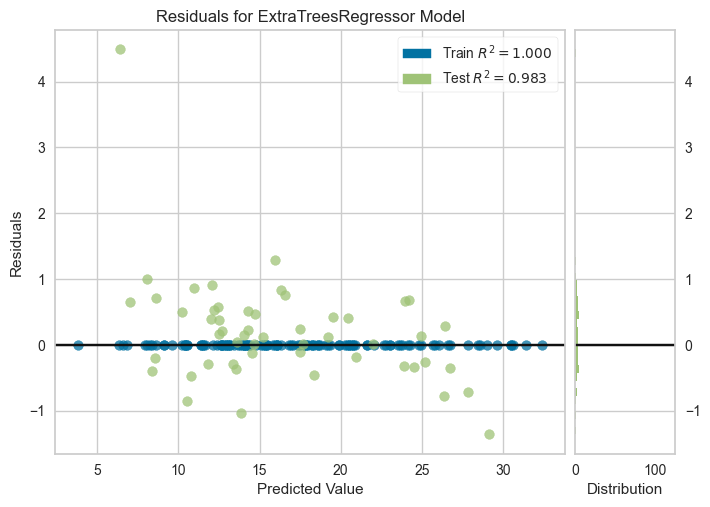

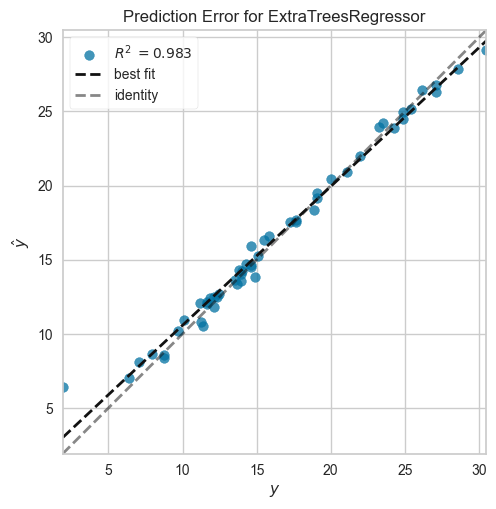

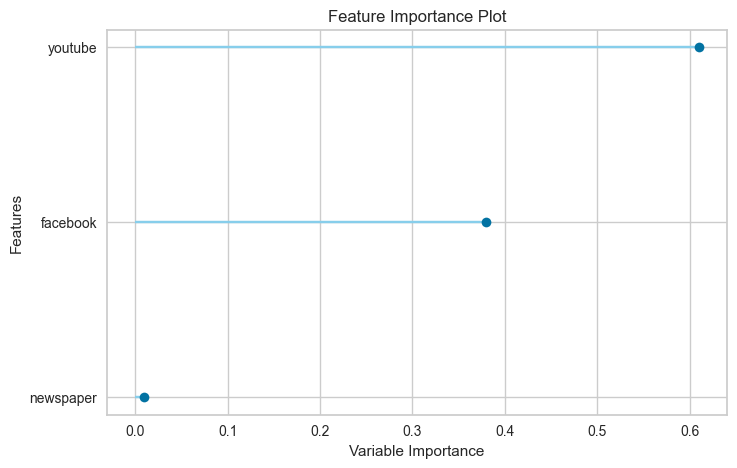

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5314,0.6906,0.8310,0.9828,0.1349,0.0776


        youtube  facebook  newspaper  sales  prediction_label
162   90.599998     12.96   7.200000  11.88           12.4536
42   131.759995     17.16  38.040001  14.88           13.8528
110  221.880005     52.68   2.040000  24.84           24.9756
114  125.519997      6.84  41.279999  12.48           12.6876
144  202.080002      8.52  15.360000  14.04           14.2656


      youtube   facebook  newspaper  prediction_label
0   84.720001  19.200001  48.959999         12.600000
1  351.480011  33.959999  51.840000         25.680000
2  135.479996  20.879999  46.320000         14.280000
3  116.639999   1.800000  36.000000         11.520000
4  318.720001  24.000000   0.360000         20.879999
Transformation Pipeline and Model Successfully Saved


In [6]:
if __name__ == "__main__":
    
    A = input("For Regression press R for Classification press C")
    
    if A == "R":
        file_path = input("Drop your datasets path here")
        df = loading_dataset(file_path)
        data_visualization(df)
        PyCaret_Regression(df)

    elif A == "C":
        file_path = input("Drop your datasets path here")
        df = loading_dataset(file_path)
        data_visualization(df)
        PyCaret_Binary_Multiclass_classification(df)

    else:
        print("Please Enter a valid input")


In [7]:
# # load pipeline
# loaded_best_pipeline = load_model('my_first_pipeline')
# loaded_best_pipeline

In [8]:
# # load pipeline
# loaded_best_pipeline = load_model('my_second_pipeline')
# loaded_best_pipeline